# Pushkal Ojha
# 220968422
# Batch B2
# Roll no: 69

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
import tabulate
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,precision_score,f1_score,recall_score,confusion_matrix
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder

## Importing the dataset

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Label Encoding Species columns so that string classes are converted into numerical Categoricals

In [5]:
le = LabelEncoder()

In [6]:
df['Species_encoded'] = le.fit_transform(df['Species'])

In [7]:
df.drop(columns = 'Species',inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               150 non-null    int64  
 1   SepalLengthCm    150 non-null    float64
 2   SepalWidthCm     150 non-null    float64
 3   PetalLengthCm    150 non-null    float64
 4   PetalWidthCm     150 non-null    float64
 5   Species_encoded  150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_encoded
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_encoded
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species_encoded,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


## Looking for missing values

In [11]:
df.isnull().sum()

Id                 0
SepalLengthCm      0
SepalWidthCm       0
PetalLengthCm      0
PetalWidthCm       0
Species_encoded    0
dtype: int64

### Note:No missing values

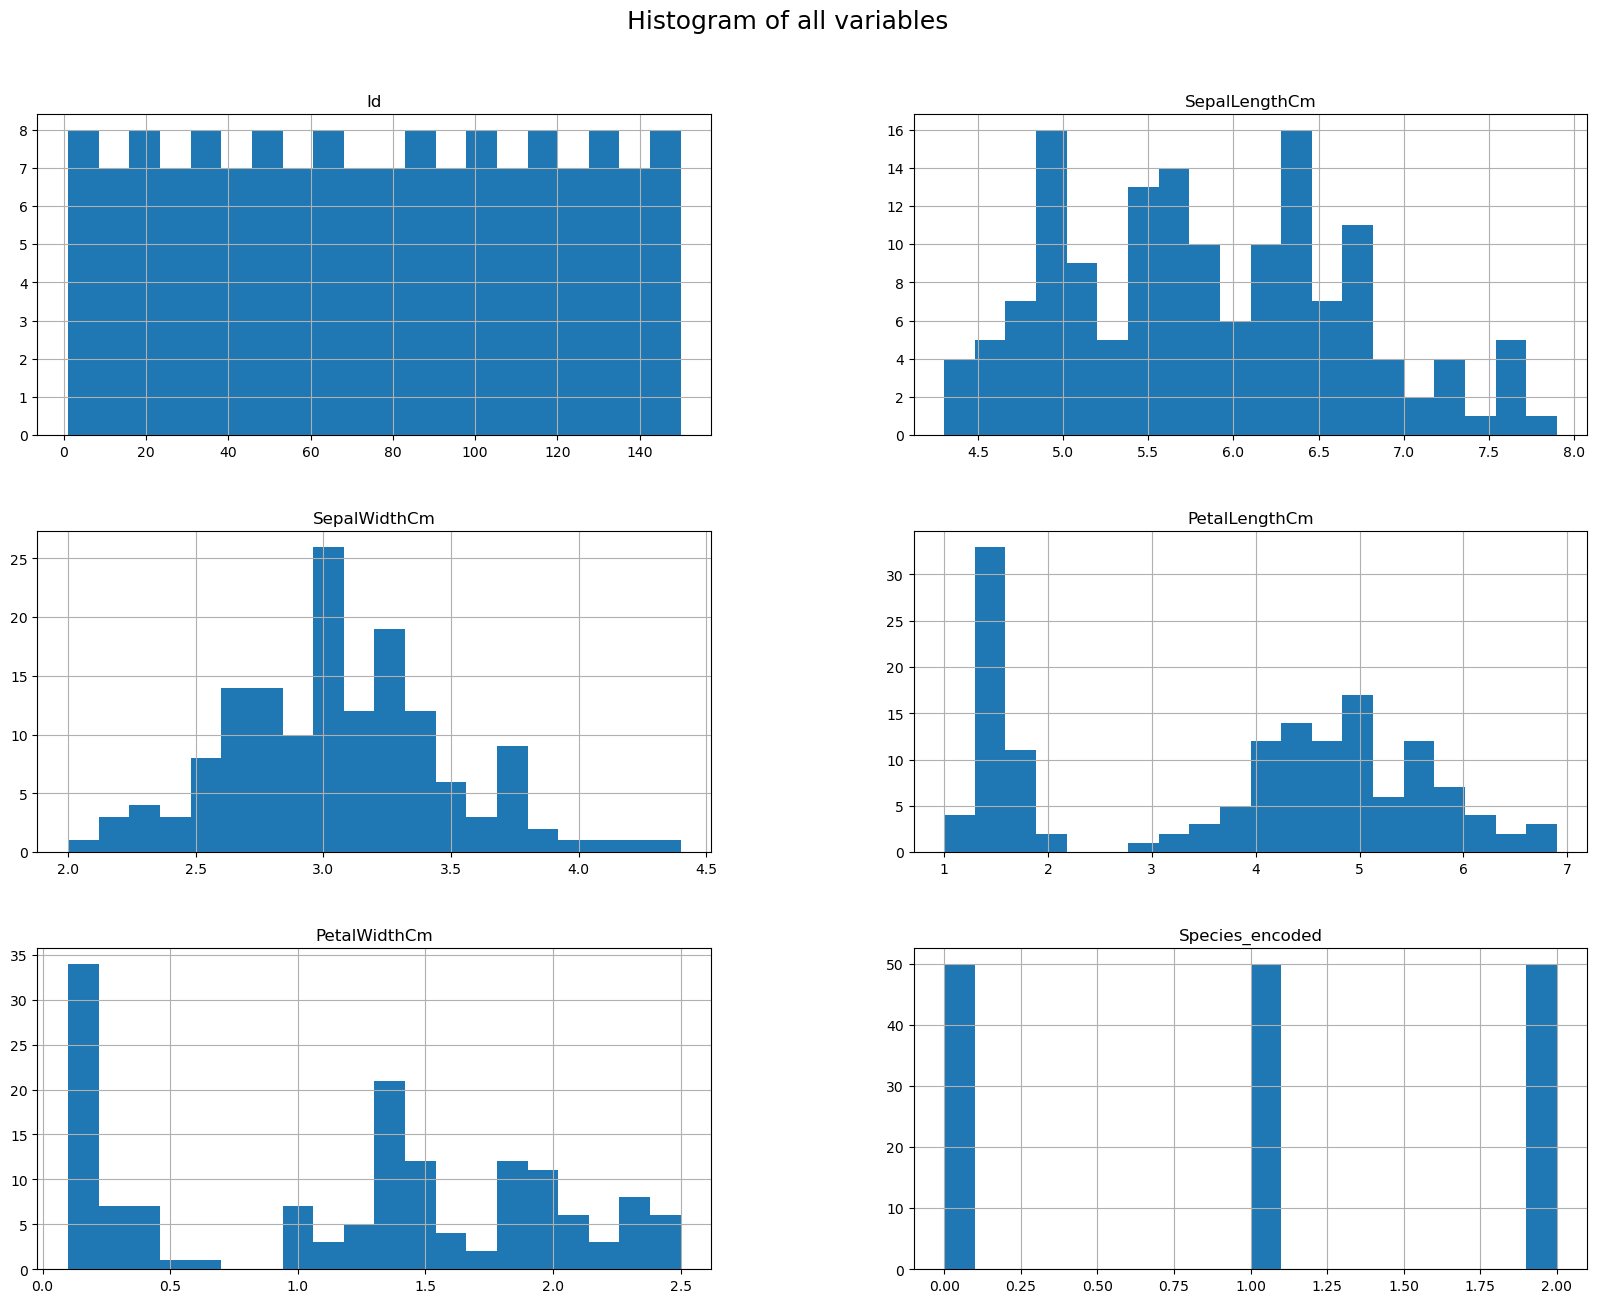

In [12]:
df.hist(bins = 20, figsize = (20,15))
plt.suptitle("Histogram of all variables", y=0.95, fontsize = 18)
plt.show()

## Showing correlation using a good heatmap

In [13]:
corr_mat = df.corr()

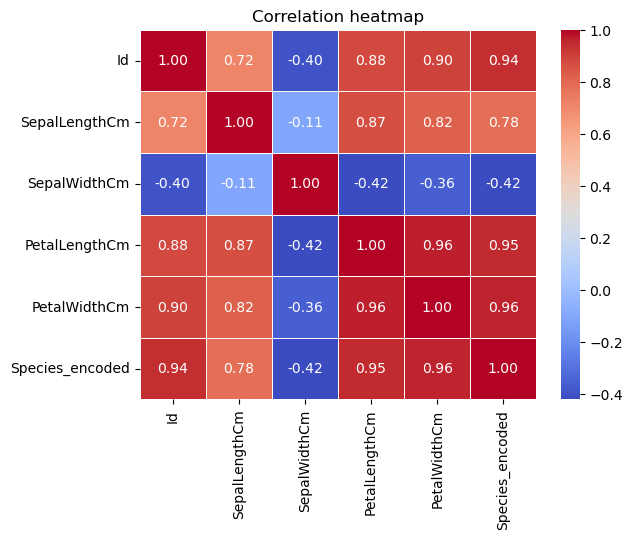

In [14]:
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth = .5)
plt.title("Correlation heatmap")
plt.show()

### Feature Scaling

In [15]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species_encoded'],
      dtype='object')

In [16]:
numerical_cols =  ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [17]:
scaler = StandardScaler()

In [18]:
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [19]:
X = df.drop(columns = 'Species_encoded')
y = df['Species_encoded']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
k_neighbors = 5
knn_classifier = KNeighborsClassifier(n_neighbors = k_neighbors)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [23]:
y_pred = knn_classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
pd.DataFrame(y_pred,y_test)

,0
Species_encoded,
1,1
0,0
2,2
1,1
1,1
0,0
1,1
2,2
1,1


In [25]:
y_pred = knn_classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Accuracy Scores

In [26]:
acc = accuracy_score(y_test,y_pred)
acc

1.0

In [27]:
print(knn_classifier.score(X_test,y_test))
print(knn_classifier.score(X_train,y_train))

1.0
1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [28]:
acc_list = []
cr_list = []
k = []
for i in range(3,10):
    k.append(i)
    knn_classifier = KNeighborsClassifier(n_neighbors = i)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_list.append(acc)
    classification_rep = classification_report(y_test, y_pred)
    cr_list.append(classification_rep)
    print(acc)

1.0
1.0
1.0
1.0
1.0
1.0
1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [29]:
# Why am i getting Accuracy score for everything as 1 : Iris dataset is a pretty obvious dataset that's why

In [30]:
table = [
    ["K value",k],
    ["Accuracy", acc_list],
    ["Classification Report",cr_list]
]


In [31]:
tabulate.tabulate(table,headers = ['Metric','Value'],tablefmt = "pretty")

"+-----------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [32]:
k_neighbors = 5 
knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [33]:
y_pred = knn_classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
cm = metrics.confusion_matrix(y_test,y_pred)

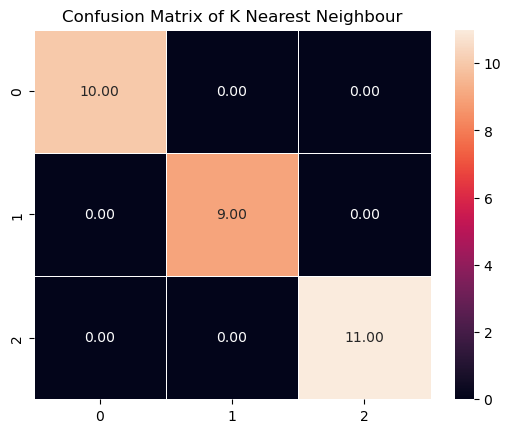

In [35]:
sns.heatmap(cm,annot = True,fmt = ".2f",linewidth = .5)
plt.title("Confusion Matrix of K Nearest Neighbour")
plt.show()

In [36]:
classification_rep = classification_report(y_test,y_pred)

In [37]:
classification_rep

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [38]:
y_pred = knn_classifier.predict_proba(X_test)[:,1]

In [39]:
y_test.unique()

array([1, 0, 2])

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label = 4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


### Plotting ROC Curve

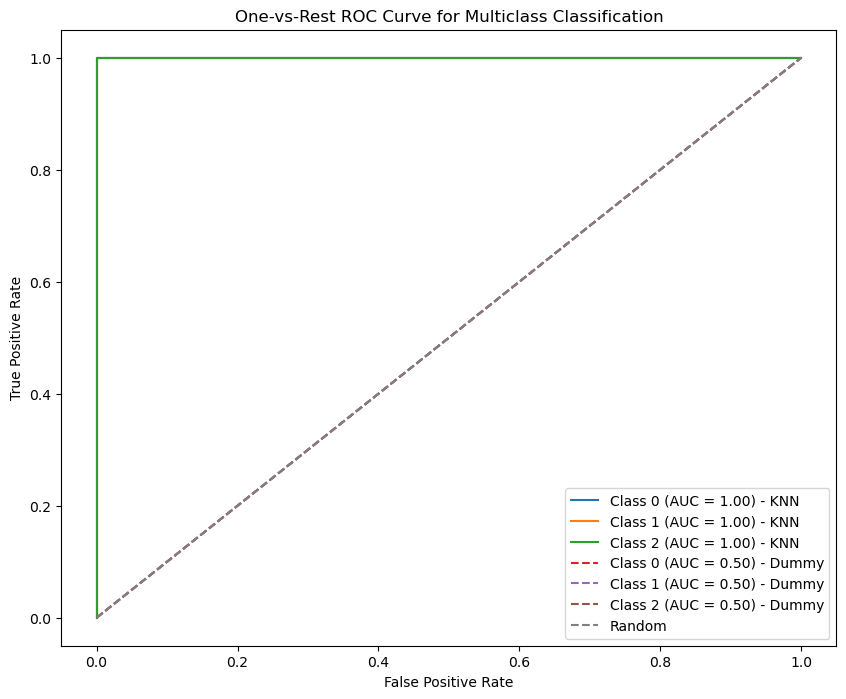

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

# Assuming y_test is the true class labels and y_scores is the predicted scores
y_test_bin = label_binarize(y_test, classes=range(3))

# KNN model predictions
# Make sure your KNN model has predict_proba method for probability estimates
y_scores = knn_classifier.predict_proba(X_test)

# One-vs-Rest ROC curve and ROC-AUC calculation for KNN
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()

for i in range(3):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# Dummy Classifier (most frequent class) for comparison
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(X_train, y_train)
y_scores_dummy = clf.predict_proba(X_test)

fpr_dummy = dict()
tpr_dummy = dict()
roc_auc_dummy = dict()

for i in range(3):
    fpr_dummy[i], tpr_dummy[i], _ = roc_curve(y_test_bin[:, i], y_scores_dummy[:, i])
    roc_auc_dummy[i] = auc(fpr_dummy[i], tpr_dummy[i])

# Plot the One-vs-Rest ROC curve for KNN and Dummy Classifier
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(fpr_knn[i], tpr_knn[i], label=f'Class {i} (AUC = {roc_auc_knn[i]:.2f}) - KNN')

for i in range(3):
    plt.plot(fpr_dummy[i], tpr_dummy[i], linestyle='--', label=f'Class {i} (AUC = {roc_auc_dummy[i]:.2f}) - Dummy')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()
    

## KNN implementation without built-in functions

In [52]:
df.iloc[0]

Id                 1.000000
SepalLengthCm     -0.900681
SepalWidthCm       1.032057
PetalLengthCm     -1.341272
PetalWidthCm      -1.312977
Species_encoded    0.000000
Name: 0, dtype: float64

In [53]:
def euclidist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [54]:
X=df.iloc[:,:-1]
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,-0.900681,1.032057,-1.341272,-1.312977
1,2,-1.143017,-0.124958,-1.341272,-1.312977
2,3,-1.385353,0.337848,-1.398138,-1.312977
3,4,-1.506521,0.106445,-1.284407,-1.312977
4,5,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...,...
145,146,1.038005,-0.124958,0.819624,1.447956
146,147,0.553333,-1.281972,0.705893,0.922064
147,148,0.795669,-0.124958,0.819624,1.053537
148,149,0.432165,0.800654,0.933356,1.447956


In [55]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species_encoded, Length: 150, dtype: int32

## Deterministic splitting

In [56]:
x_train=X.iloc[:int(X.shape[0]*.8),:]
x_test=X.iloc[int(X.shape[0]*.8):,:]
y_train=y.iloc[:int(y.shape[0]*.8)]
y_test=y.iloc[int(y.shape[0]*.8):]

In [57]:
x_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,-0.900681,1.032057,-1.341272,-1.312977
1,2,-1.143017,-0.124958,-1.341272,-1.312977
2,3,-1.385353,0.337848,-1.398138,-1.312977
3,4,-1.506521,0.106445,-1.284407,-1.312977
4,5,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...,...
115,116,0.674501,0.337848,0.876490,1.447956
116,117,0.795669,-0.124958,0.990221,0.790591
117,118,2.249683,1.726266,1.672610,1.316483
118,119,2.249683,-1.050569,1.786341,1.447956


In [58]:
def KnearestNeighbour(x_train,y_train,x_test,k):
    y_pred=[]
    for i in range(x_test.shape[0]):
        class_0=0
        class_1=0
        class_2=0
        dist=[]
        for j in range(x_train.shape[0]):
            d=euclidist(x_test.iloc[i],x_train.iloc[j])
            dist.append([d,y_train.iloc[j]])#for each distance and label(class of it)
        dist=sorted(dist)
        dist=dist[:k]#getting only k nearest neighbours
        for i in range(len(dist)):
            if(dist[i][1]==0):
                class_0+=1
            elif(dist[i][1]==1):
                class_1+=1
            else:
                class_2+=1
        if(class_0>class_1 and class_0>class_2):
            y_pred.append(0)
        elif(class_1>class_0 and class_1>class_2):
            y_pred.append(1)
        else:
            y_pred.append(2)
    return y_pred

In [60]:
y_pred=KnearestNeighbour(x_train,y_train,x_test,3)
y_pred

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [62]:
if(y_pred==list(y_test)):
    print("y_pred = y_test")
else:
    print("y_pred != y_test")

y_pred = y_test


In [70]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("accuracy is",accuracy)
print("precision is",precision)
print("f1 is",f1)
print("recall is",recall)

accuracy is 1.0
precision is 0.0
f1 is 0.0
recall is 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

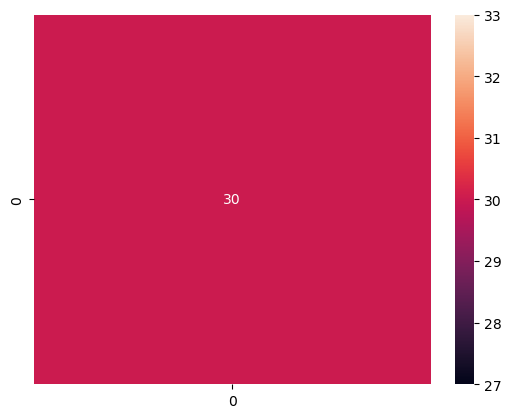

In [74]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

### Doing random splitting

In [75]:
indices = np.random.permutation(X.shape[0])

# Calculate the split index based on the desired ratio (80-20)
split_index = int(0.8 * X.shape[0])
x_train, x_test = X.iloc[indices[:split_index]], X.iloc[indices[split_index:]]
y_train, y_test = y.iloc[indices[:split_index]], y.iloc[indices[split_index:]]

In [76]:
y_pred=KnearestNeighbour(x_train,y_train,x_test,3)
y_pred

[1,
 0,
 2,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 1,
 1]

In [78]:
if(y_pred==list(y_test)):
    print("y_pred = y_test")
else:
    print("y_pred != y_test")

y_pred = y_test


In [79]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='macro')
f1=f1_score(y_test,y_pred,average='macro')
recall=recall_score(y_test,y_pred,average='macro')
print("accuracy is",accuracy)
print("precision is",precision)
print("f1 is",f1)
print("recall is",recall)

accuracy is 1.0
precision is 1.0
f1 is 1.0
recall is 1.0


<AxesSubplot:>

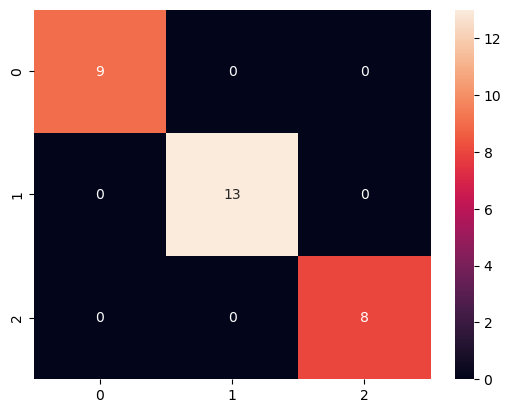

In [80]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)